In [61]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import numpy as np
from wordcloud import WordCloud as wcl
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Co2 Emmision


In [62]:
co2 = pd.read_csv("./data/CO2 emissions per capita per country.csv")

In [63]:
co2.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.915833,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,0.107637,0.123734,...,0.241723,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN
2,Angola,AGO,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,0.246413,0.154912,...,1.232495,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN
3,Albania,ALB,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,...,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.121652,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN


In [64]:
co2 = co2.drop(['2015','2016','2017','2018'],axis=1)

In [65]:
y = co2.columns[12:]

In [66]:
y = y.to_list()

In [67]:
b = []
for i in y:
    b.append(int(i))

In [68]:
values = []
for key in y:
    val = np.sum(co2[key])
    values.append(val)

In [69]:
print (len(values))

45


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
def plot_CO2_emission(feature,years,col = 'orange'):
    sns.regplot(x=years, y=feature,color=col, lowess=True,label="Co2 emission")
    plt.title("CO2 Emissions: 1970-2013 ", size=18)
    plt.ylabel("CO2 emission ", size=15)
    plt.xlabel("Year", size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend()
  # plt.show()

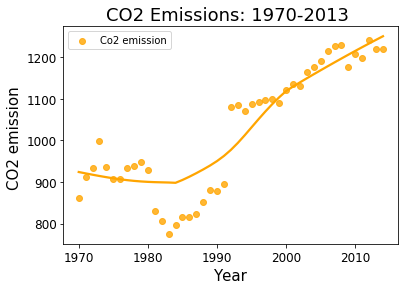

In [72]:
plot_CO2_emission(feature=np.array(values),years=np.array(b),col = 'orange')

In [73]:
countries = np.array(co2.iloc[:,1])

In [74]:
len(countries)

264

In [75]:
countries_emmision = []
for i in range(len(countries)):
    tmp = np.array(co2.iloc[i,2:])
    countries_emmision.append(tmp.mean())
    

In [76]:
countries_clear = []
countries_emmision_clear = []
for i in range(len(countries_emmision)):
    if(np.isnan(countries_emmision[i]) == False and countries[i] in ['IND','USA','AUS','NZL','QAT','CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM','MNP', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAC', 'NAM', 'NCL'] ):
        countries_clear.append(countries[i])
        countries_emmision_clear.append(countries_emmision[i])

In [77]:
def plot_CO2_emission_2(feature,countries_,col='blue'):
    plt.figure(num=None, figsize=(40,6),dpi = 100, facecolor='w', edgecolor='k')
#     sns.regplot(x=countries_, y=feature,color='orange', lowess=True,label="Co2 emission")
    plt.plot(countries_,feature,color = col)
#     plt.annotate(feature)
    plt.title("CO2 Emissions: 1970-2013 ", size=18)
    plt.ylabel("CO2 emission ", size=15)
    plt.xlabel("Countries", size=15)
    plt.xticks(size=12, rotation='vertical')
    plt.yticks(size=12)
    plt.legend(['Co2 Emission'])

In [78]:
countries_clear_2 = []
countries_emmision_clear_2 = []
for i in range(len(countries_emmision)):
    if(np.isnan(countries_emmision[i]) == False):
        countries_clear_2.append(countries[i])
        countries_emmision_clear_2.append(countries_emmision[i])

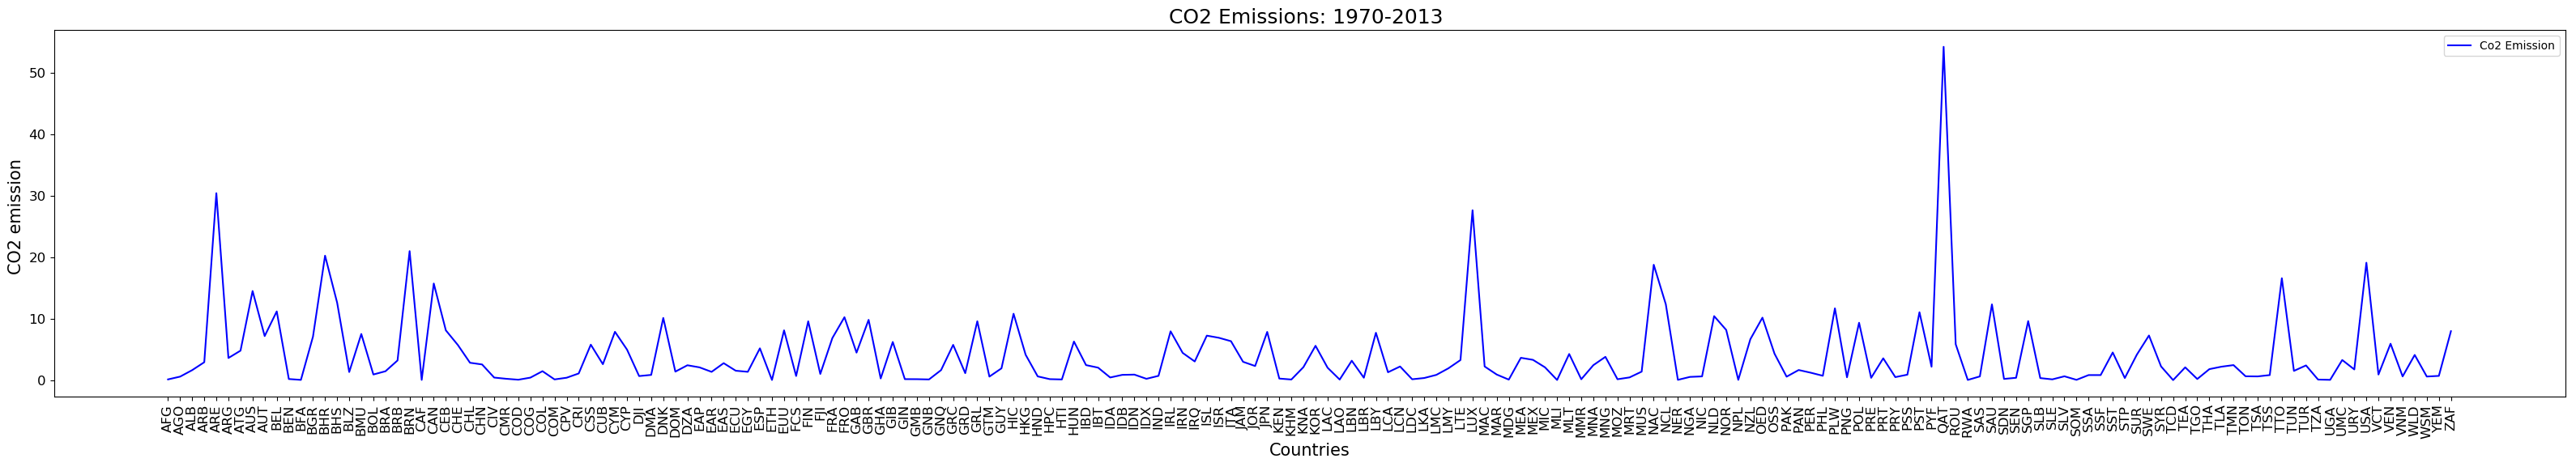

In [79]:
plot_CO2_emission_2(feature=np.array(countries_emmision_clear_2),countries_=np.array(countries_clear_2))


# Tweets

In [80]:
import sys
print(sys.executable)

/home/ashish/anaconda3/bin/python


In [81]:
df = pd.read_csv(r"1377884570_tweet_global_warming.csv", encoding ="latin-1") 

In [82]:
df.tail()

,tweet,existence,confidence,other1,other2,other3
6085,"@bloodless_coup ""The phrase 'global warming' s...",Y,1,NaN,NaN,NaN
6086,Virginia to Investigate Global Warming Scienti...,NaN,1,NaN,NaN,NaN
6087,Global warming you tube parody you will enjoy ...,N,0.6411,NaN,NaN,NaN
6088,One-Eyed Golfer: Don't dare tell me about glob...,N,1,NaN,NaN,NaN
6089,man made global warming a hair brained theory ...,N,1,NaN,NaN,NaN


In [83]:
df=df.replace(to_replace ="Y", value ="Yes") 

In [84]:
df=df.replace(to_replace ="N", value ="No") 

In [85]:
y1 = df[df.existence == 'Yes']

In [86]:
n1 = df[df.existence =='No']

In [87]:
n2 = df[df.existence =='NA']

In [88]:
y1.tail()

,tweet,existence,confidence,other1,other2,other3
6080,"Bats, Birds and Lizards Can Fight Climate Chan...",Yes,0.6751,NaN,NaN,NaN
6081,"Bats, Birds and Lizards Can Fight Climate Chan...",Yes,1,NaN,NaN,NaN
6082,Global warming: The fossil fuel dilemma: Ameri...,Yes,1,NaN,NaN,NaN
6084,It's 83ï¿½_ï¿½ and climbing in NYC. August wea...,Yes,1,NaN,NaN,NaN
6085,"@bloodless_coup ""The phrase 'global warming' s...",Yes,1,NaN,NaN,NaN


In [89]:
d1=pd.concat([y1,n1])
df=pd.concat([d1,n2])

In [90]:
def word_cloud(words):
    stopwords = set(STOPWORDS)
    wordcloud = wcl(max_words=204,width = 603, height = 603,background_color ='black', stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    plt.figure(figsize = (9, 9), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [91]:
def extract_words(tweets):
    distinct_words = ' ' 
    for tweet in tweets: 
        tweet = str(tweet)
        tokens = tweet.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        for words in tokens: 
            distinct_words = distinct_words + words + ' '
    return distinct_words

  

In [92]:
unique_wrds = extract_words(df.tweet)

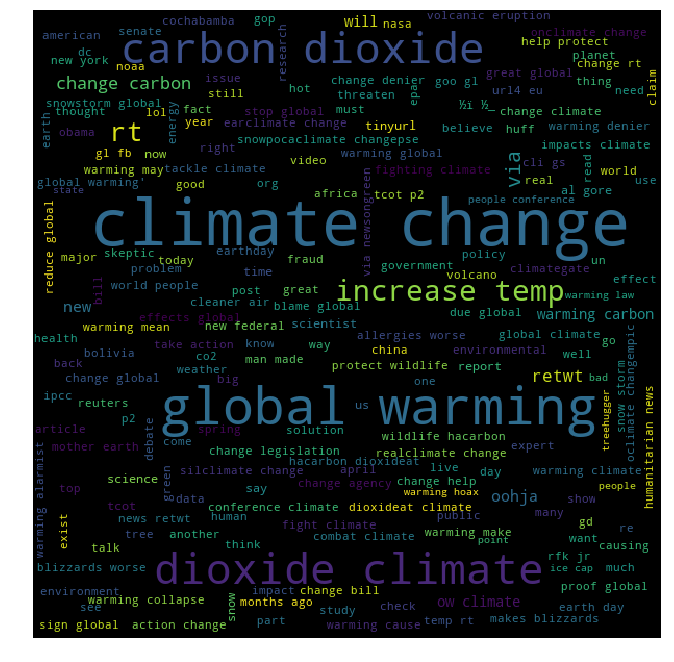

In [53]:
word_cloud(unique_wrds)

# Fossil Fuels

In [94]:
with open('Fossil-fuel co2 Global Estimates (1751-2013).csv') as f:
    df = pd.read_csv(f)

In [95]:
df.tail()

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita
258,2009,8641,1580,3065,3517,415,64,1.26
259,2010,9137,1700,3129,3795,448,66,1.32
260,2011,9508,1762,3158,4027,496,64,1.36
261,2012,9671,1787,3214,4086,520,65,1.36
262,2013,9776,1806,3216,4131,554,68,1.36


In [96]:
def plot_CO2_emission(feature1,feature2,name,col='blue'):
    sns.regplot(x=feature1, y=feature2,color=col ,lowess=True,label=name)
    plt.title("CO2 Emissions from Fossil Fuel's via Cement Manufacture, and Gas Flaring: 1751-2013 ", size=18)
    plt.ylabel("CO2 emission ( "+name+" )", size=15)
    plt.xlabel("Year", size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend()
    plt.show()

In [97]:
def plot_CO2_emission_all(feature1,feature2,name):
    sns.regplot(x=feature1, y=feature2,lowess=True,label=name)
    plt.title("CO2 Emissions from Fossil Fuel's via Cement Manufacture, and Gas Flaring: 1751-2013 ", size=18)
    plt.ylabel("CO2 emission ( "+name+" )", size=15)
    plt.xlabel("Year", size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend()
    

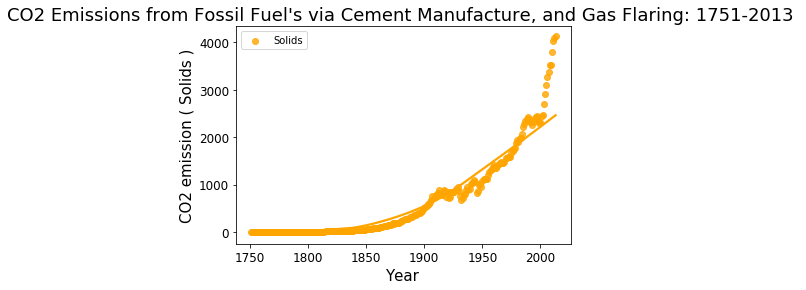

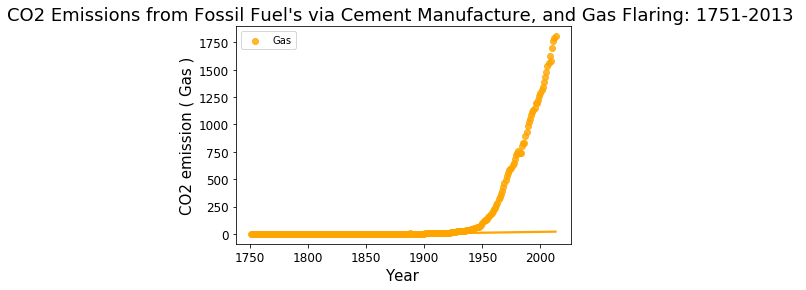

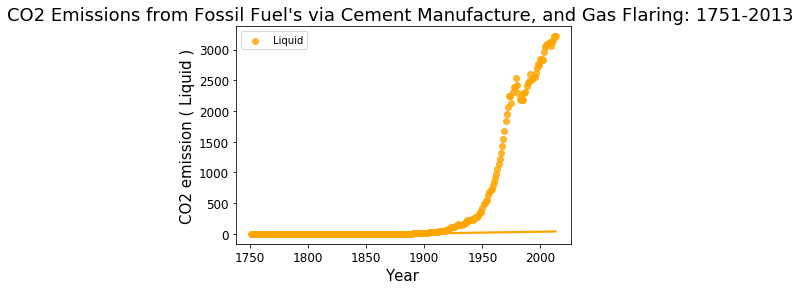

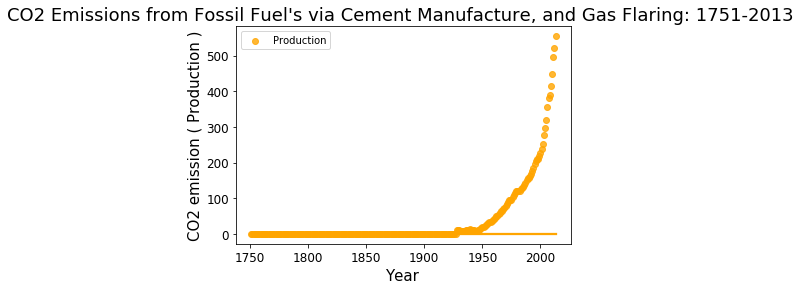

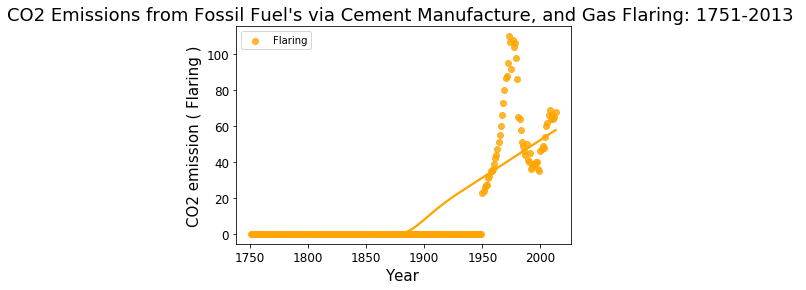

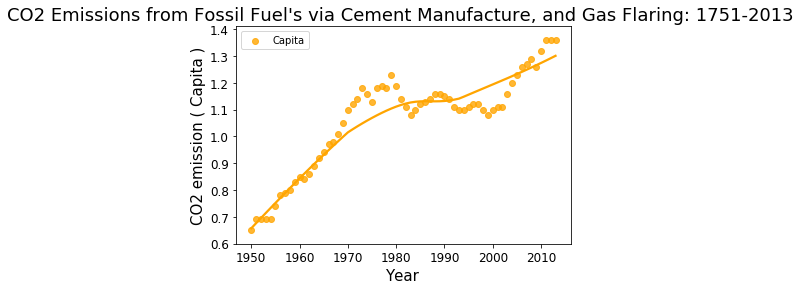

In [98]:
plot_CO2_emission(df.Year,df.Solids,'Solids','orange')
plot_CO2_emission(df.Year,df.Gas,'Gas','orange')
plot_CO2_emission(df.Year,df.Liquids,'Liquid','orange')
plot_CO2_emission(df.Year,df.Production,'Production','orange')
plot_CO2_emission(df.Year,df.Flaring,'Flaring','orange')
plot_CO2_emission(df.Year,df.Capita,'Capita','orange')

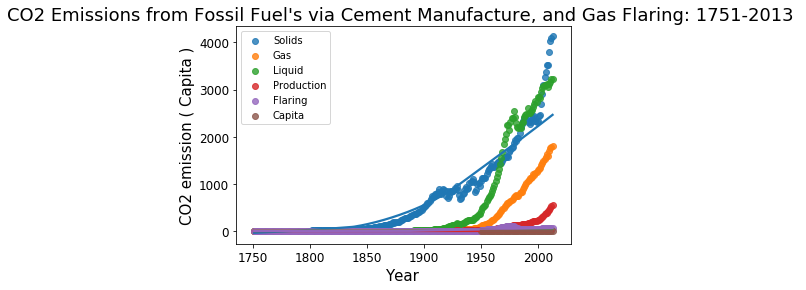

In [99]:
plot_CO2_emission_all(df.Year,df.Solids,'Solids')
plot_CO2_emission_all(df.Year,df.Gas,'Gas')
plot_CO2_emission_all(df.Year,df.Liquids,'Liquid')
plot_CO2_emission_all(df.Year,df.Production,'Production')
plot_CO2_emission_all(df.Year,df.Flaring,'Flaring')
plot_CO2_emission_all(df.Year,df.Capita,'Capita')

In [100]:
df.keys()

Index(['Year', 'Total', 'Gas', 'Liquids', 'Solids', 'Production', 'Flaring',
       'Capita'],
      dtype='object')

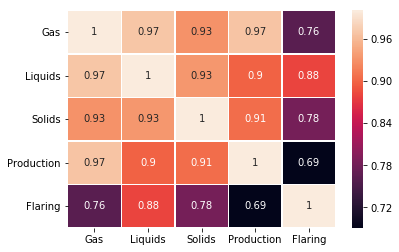

In [101]:
sns.heatmap(df.drop(['Capita','Year','Total'],axis=1).corr(),linecolor='white',linewidths=0.4,annot=True)

As we can see from multiple plots the trends in climate change and increase in level's of carbon dioxide in our surrounding over the years span.

From Tweets we can infer that increase in carbon dioxide leads to increase in temperature which is responsible for global warming